In [8]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Notebook to read in the nexus files and only save the useful stuff to slim the files down
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

In [54]:
columms_to_read = ["event_id","kin_energy", "primary", "particle_id", "initial_momentum_x", "initial_momentum_y","initial_momentum_z"]
particles = pd.read_hdf("/Users/mistryk2/Packages/nexus/Leptoquark.h5", "MC/particles")

particles = particles[columms_to_read]

display(particles)

,event_id,kin_energy,primary,particle_id,initial_momentum_x,initial_momentum_y,initial_momentum_z
0,0,1.507022,1,2,1.554097,0.931814,-0.726495
1,0,0.016953,0,12,0.111363,-0.009842,-0.071517
2,0,0.000046,0,11,-0.003745,0.005690,-0.000683
3,0,0.000045,0,10,-0.003192,-0.003793,-0.004643
4,0,0.000553,0,9,-0.005967,-0.005816,-0.022279
...,...,...,...,...,...,...,...
465569,9999,0.004029,0,16,0.021887,-0.060013,0.007328
465570,9999,0.000169,0,15,-0.006453,0.000880,0.011394
465571,9999,0.000750,0,14,0.022880,-0.015593,0.000468
465572,9999,0.019912,0,8,0.089912,-0.091071,0.066091


Text(0.5, 1.0, 'Leptoquark')

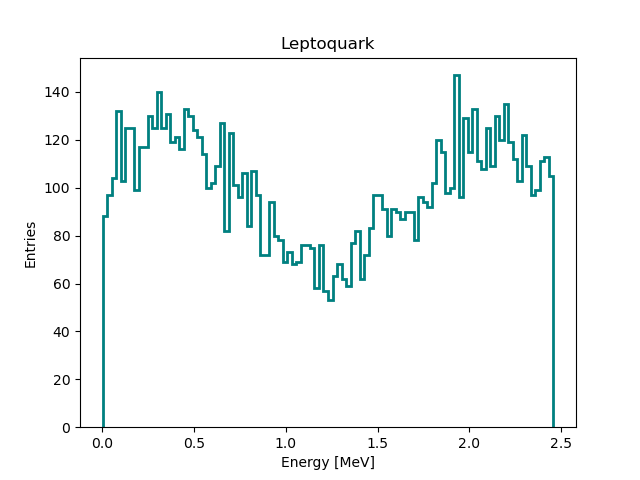

In [57]:
plt.figure()
plt.hist(particles[particles.particle_id==1].kin_energy, bins=100, histtype="step",color="Teal",linewidth=2);
plt.xlabel("Energy [MeV]")
plt.ylabel("Entries")
plt.title("Leptoquark")

,event_id,kin_energy_1,primary_1,particle_id_1,initial_momentum_x_1,initial_momentum_y_1,initial_momentum_z_1,kin_energy_2,primary_2,particle_id_2,initial_momentum_x_2,initial_momentum_y_2,initial_momentum_z_2
0,0,2.178950,1,1,0.537276,2.573956,0.246560,0.279049,1,2,-0.202207,0.542210,-0.167856
1,1,2.157862,1,1,0.452096,2.493800,-0.662022,0.300120,1,2,0.015836,0.009902,0.629639
2,2,0.888109,1,1,0.604365,0.987039,0.597396,1.569875,1,2,0.574424,-1.009564,1.649162
3,3,0.635476,1,1,-0.843578,-0.419336,0.407205,1.822505,1,2,-0.989688,2.030218,-0.287842
4,4,1.828491,1,1,0.341172,1.479270,1.705127,0.629491,1,2,0.320809,-0.406557,0.878288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.760453,1,1,1.798178,-0.310537,1.252397,0.697543,1,2,0.327583,0.951120,-0.433028
99996,99996,0.284038,1,1,-0.488127,0.040363,0.362032,2.173942,1,2,1.737192,-0.558118,1.902224
99997,99997,0.216359,1,1,0.058294,-0.302197,-0.416182,2.241606,1,2,-1.645583,-0.743488,-2.013703
99998,99998,1.164816,1,1,1.440846,-0.023206,0.686045,1.293153,1,2,1.576510,-0.516246,0.491884


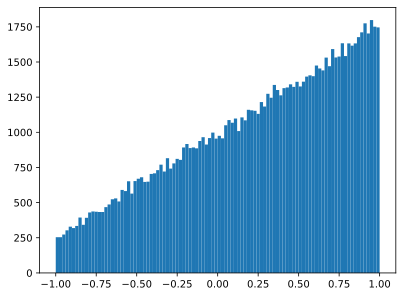

In [22]:
# Calculate the angle between momentum vectors
def calculate_angle(row):
    # Extract momentum components for particle 1
    p1 = np.array([row['initial_momentum_x_1'], row['initial_momentum_y_1'], row['initial_momentum_z_1']])
    # Extract momentum components for particle 2
    p2 = np.array([row['initial_momentum_x_2'], row['initial_momentum_y_2'], row['initial_momentum_z_2']])
    
    # Calculate dot product and magnitudes
    dot_product = np.dot(p1, p2)
    magnitude_p1 = np.linalg.norm(p1)
    magnitude_p2 = np.linalg.norm(p2)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (magnitude_p1 * magnitude_p2)
    
    # Ensure the value is within the valid range for arccos (to avoid numerical errors)
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in radians
    # angle = np.arccos(cos_theta)
    
    return cos_theta

# Filter particles with particle_id 1 and 2
particle_1 = particles[particles.particle_id == 1].copy()
particle_2 = particles[particles.particle_id == 2].copy()

# Merge the DataFrames on 'event' to pair particles from the same event
merged_particles = pd.merge(particle_1, particle_2, on="event_id", suffixes=('_1', '_2'))
display(merged_particles)


# Apply the function to each row in the merged DataFrame
merged_particles['angle'] = merged_particles.apply(calculate_angle, axis=1)


plt.figure()
plt.hist(merged_particles['angle'], bins = 100);

In [36]:
# Load in the smeared files and check them

files = ["../config/ATPC_leptoquark.h5", "../config/ATPC_leptoquark1mm_smear.h5", "../config/ATPC_leptoquark2mm_smear.h5", "../config/ATPC_leptoquark4mm_smear.h5", "../config/ATPC_leptoquark10mm_smear.h5"]

hits = []

for f in files:
    hits.append(pd.read_hdf(f, "MC/hits"))


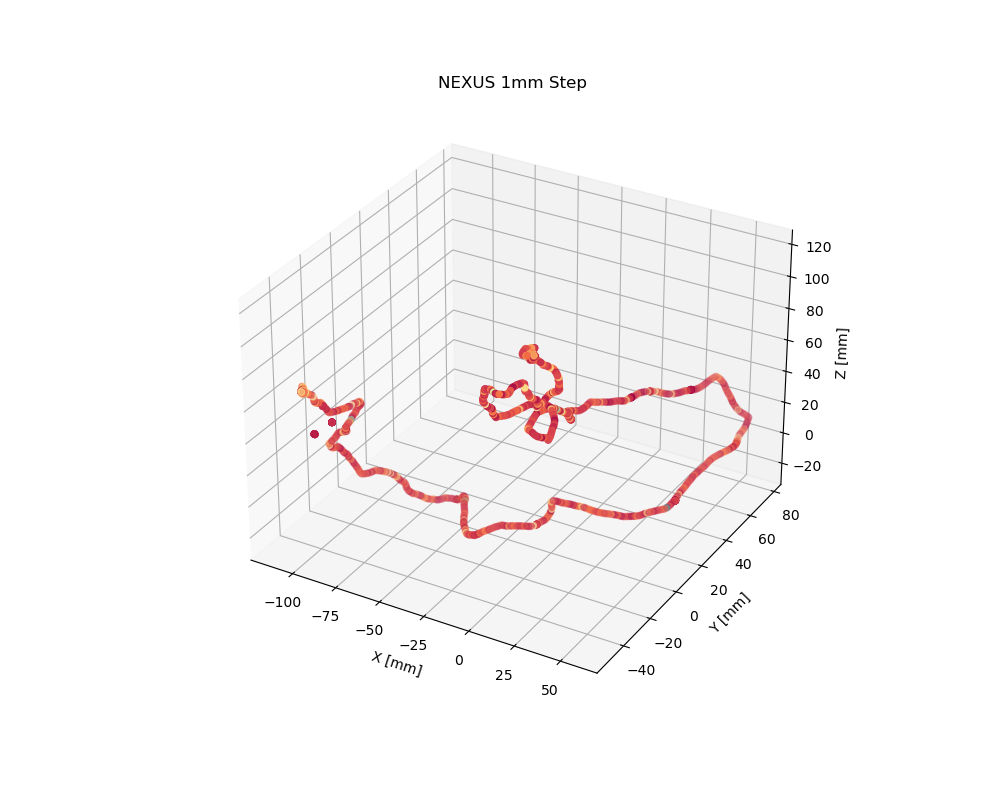

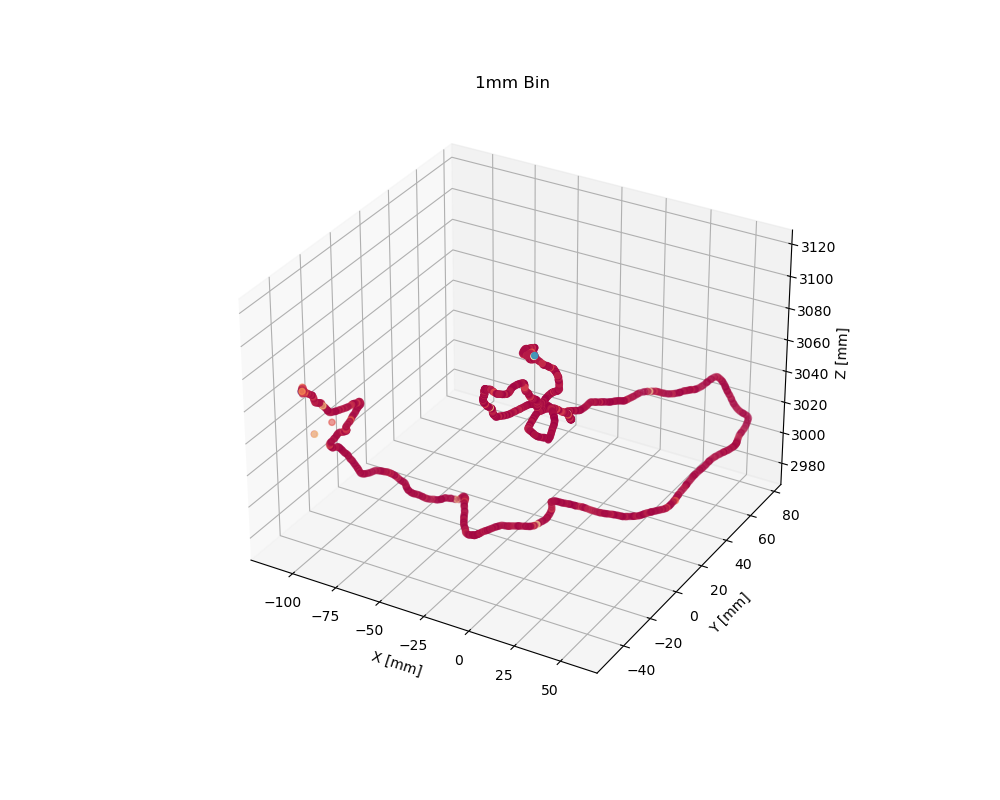

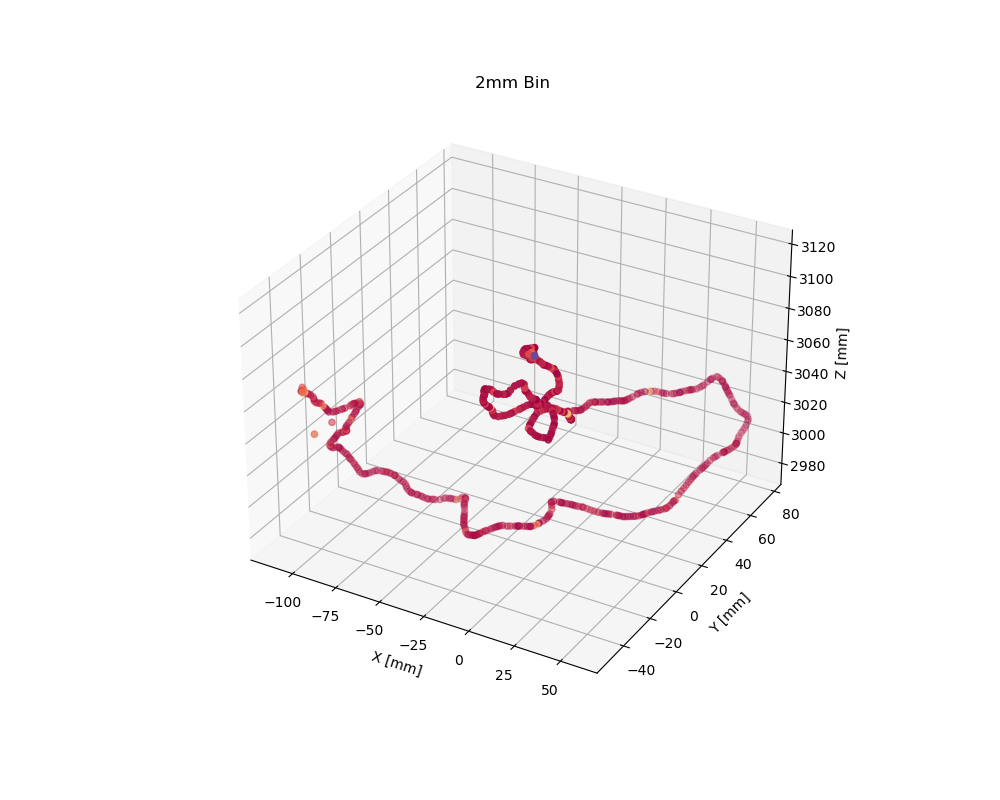

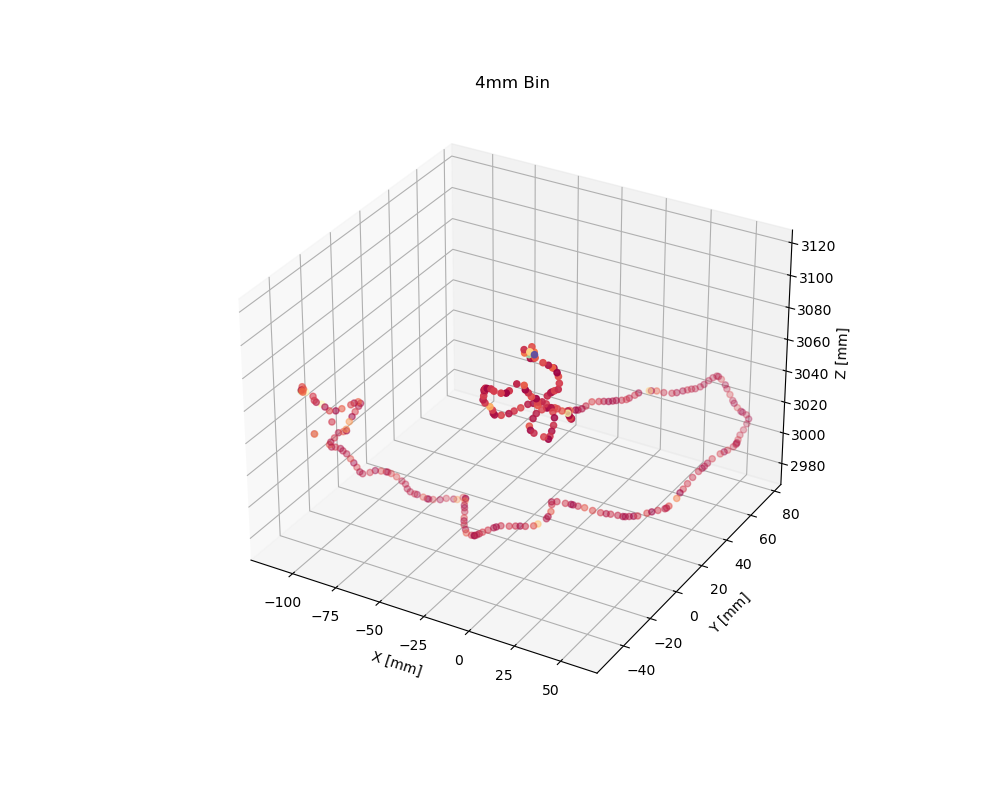

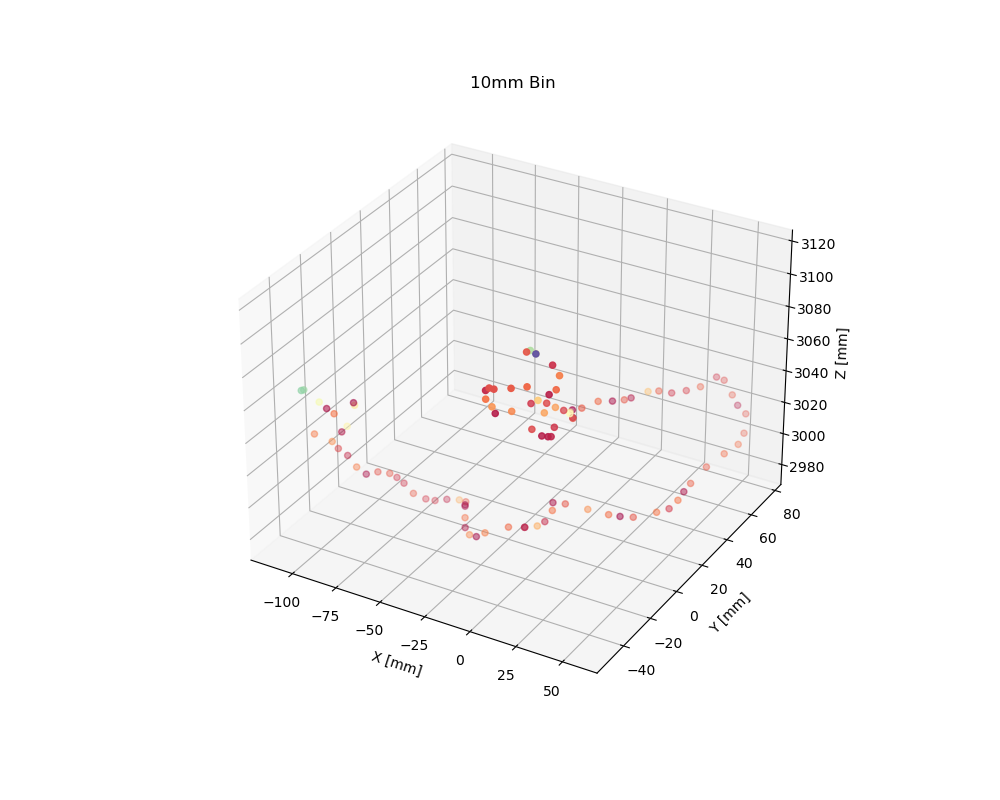

In [49]:
%matplotlib widget

bins_labels = ["NEXUS 1mm Step", "1mm Bin", "2mm Bin", "4mm Bin", "10mm Bin"]

for indx,h in enumerate(hits):

    event = h[h.event_id ==0]


    # Plot in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # colors = ['r' if count == 1 or count == 0 else 'k' for count in connection_count]
    ax.scatter(event['x'], event['y'], event['z'], marker='o', c=event["energy"],cmap='Spectral')
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')
    ax.set_zlabel('Z [mm]')
    ax.set_title(bins_labels[indx])
    plt.show()



In [38]:
# Compare events from nudobe generator vs the decay0 generator

nexus = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_0nuBB_slim.h5", "MC/particles")
nudobe = pd.read_hdf("/Users/mistryk2/Packages/nexus/ATPC_mbb_slim.h5", "MC/particles")

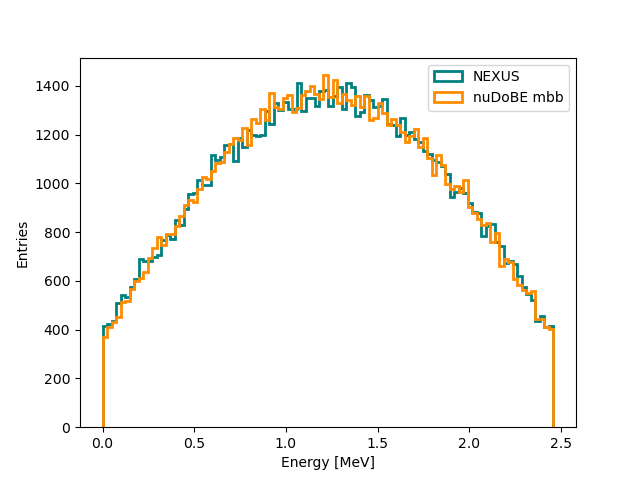

In [44]:
plt.figure()
plt.hist(nexus[nexus.particle_id==1].kin_energy, bins=100, histtype="step",color="Teal",linewidth=2,label="NEXUS");
plt.hist(nudobe[nudobe.particle_id==1].kin_energy, bins=100, histtype="step",color="DarkOrange",linewidth=2,label="nuDoBE mbb");
plt.xlabel("Energy [MeV]")
plt.ylabel("Entries")
plt.legend()

,event_id,kin_energy_1,primary_1,particle_id_1,initial_momentum_x_1,initial_momentum_y_1,initial_momentum_z_1,kin_energy_2,primary_2,particle_id_2,initial_momentum_x_2,initial_momentum_y_2,initial_momentum_z_2,angle
0,0,2.178950,1,1,0.537276,2.573956,0.246560,0.279049,1,2,-0.202207,0.542210,-0.167856,0.782759
1,1,2.157862,1,1,0.452096,2.493800,-0.662022,0.300120,1,2,0.015836,0.009902,0.629639,-0.233314
2,2,0.888109,1,1,0.604365,0.987039,0.597396,1.569875,1,2,0.574424,-1.009564,1.649162,0.127847
3,3,0.635476,1,1,-0.843578,-0.419336,0.407205,1.822505,1,2,-0.989688,2.030218,-0.287842,-0.057206
4,4,1.828491,1,1,0.341172,1.479270,1.705127,0.629491,1,2,0.320809,-0.406557,0.878288,0.432018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.760453,1,1,1.798178,-0.310537,1.252397,0.697543,1,2,0.327583,0.951120,-0.433028,-0.102573
99996,99996,0.284038,1,1,-0.488127,0.040363,0.362032,2.173942,1,2,1.737192,-0.558118,1.902224,-0.113262
99997,99997,0.216359,1,1,0.058294,-0.302197,-0.416182,2.241606,1,2,-1.645583,-0.743488,-2.013703,0.690569
99998,99998,1.164816,1,1,1.440846,-0.023206,0.686045,1.293153,1,2,1.576510,-0.516246,0.491884,0.949093


,event_id,kin_energy_1,primary_1,particle_id_1,initial_momentum_x_1,initial_momentum_y_1,initial_momentum_z_1,kin_energy_2,primary_2,particle_id_2,initial_momentum_x_2,initial_momentum_y_2,initial_momentum_z_2,angle
0,0,2.178950,1,1,0.537276,2.573956,0.246560,0.279049,1,2,-0.202207,0.542210,-0.167856,0.782759
1,1,2.157862,1,1,0.452096,2.493800,-0.662022,0.300120,1,2,0.015836,0.009902,0.629639,-0.233314
2,2,0.888109,1,1,0.604365,0.987039,0.597396,1.569875,1,2,0.574424,-1.009564,1.649162,0.127847
3,3,0.635476,1,1,-0.843578,-0.419336,0.407205,1.822505,1,2,-0.989688,2.030218,-0.287842,-0.057206
4,4,1.828491,1,1,0.341172,1.479270,1.705127,0.629491,1,2,0.320809,-0.406557,0.878288,0.432018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.760453,1,1,1.798178,-0.310537,1.252397,0.697543,1,2,0.327583,0.951120,-0.433028,-0.102573
99996,99996,0.284038,1,1,-0.488127,0.040363,0.362032,2.173942,1,2,1.737192,-0.558118,1.902224,-0.113262
99997,99997,0.216359,1,1,0.058294,-0.302197,-0.416182,2.241606,1,2,-1.645583,-0.743488,-2.013703,0.690569
99998,99998,1.164816,1,1,1.440846,-0.023206,0.686045,1.293153,1,2,1.576510,-0.516246,0.491884,0.949093


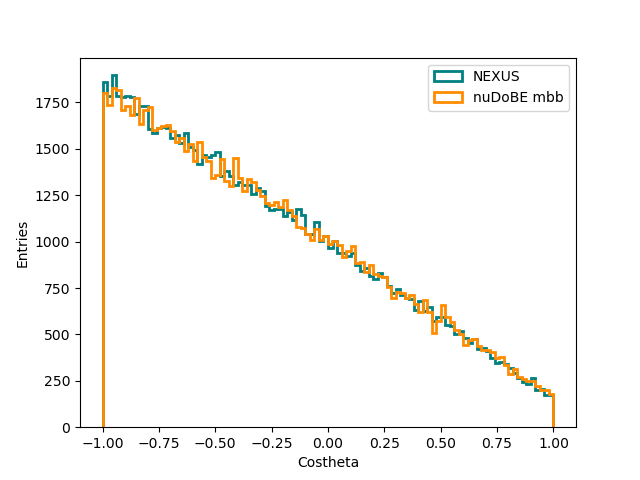

In [45]:
# Filter particles with particle_id 1 and 2
particle_1_nexus = nexus[nexus.particle_id == 1].copy()
particle_2_nexus = nexus[nexus.particle_id == 2].copy()

# Merge the DataFrames on 'event' to pair particles from the same event
merged_particles_nexus = pd.merge(particle_1_nexus, particle_2_nexus, on="event_id", suffixes=('_1', '_2'))
display(merged_particles)


# Apply the function to each row in the merged DataFrame
merged_particles_nexus['angle'] = merged_particles_nexus.apply(calculate_angle, axis=1)


# Filter particles with particle_id 1 and 2
particle_1_nudobe = nudobe[nudobe.particle_id == 1].copy()
particle_2_nudobe = nudobe[nudobe.particle_id == 2].copy()

# Merge the DataFrames on 'event' to pair particles from the same event
merged_particles_nudobe = pd.merge(particle_1_nudobe, particle_2_nudobe, on="event_id", suffixes=('_1', '_2'))
display(merged_particles)


# Apply the function to each row in the merged DataFrame
merged_particles_nudobe['angle'] = merged_particles_nudobe.apply(calculate_angle, axis=1)


plt.figure()
plt.hist(merged_particles_nexus['angle'], bins = 100, histtype="step",color="Teal",linewidth=2,label="NEXUS");
plt.hist(merged_particles_nudobe['angle'], bins = 100, histtype="step",color="DarkOrange",linewidth=2,label="nuDoBE mbb");
plt.xlabel("Costheta")
plt.ylabel("Entries")
plt.legend()